# Project background and objectives

In this project, I am taking on the role of a social media analyst responsible for collecting, cleaning, and analysing data on a client's social media posts. My job is to use this analysis to communicate insights and make data-driven recommendations to help my client optimise their social media strategy and increase their reach and engagement.  


In [1]:
# Import the necessary libraries

import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns


I am supposing that I've been asked to collect data relating to the number of likes on Facebook posts across different categories.

As this is a hypothetical client and I have no real data to work with, I need to generate some random data for the social media data I will be exploring and analysing later in the project. The data will consist of three features:

1. Date 
1. Category
1. Number of likes

The dataset will contain 1000 rows, each of which will be assigned a random date in the date range 01-01-2023 - 31-12-2023, a random category from a predefined list, and a random number of likes in the range 0-5000.


## Generating the data

In [2]:
# Here I define a list of categories

categories = ['Travel', 'Sport', 'Entertainment', 'Family', 'Health', 'Fashion', 'Food']

In [3]:
# Create data dictionary and populate with random data.

# Define the start and end dates
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')

# Set the random seed for reproducibility
rng = np.random.default_rng(seed=42)

# Generate 1000 random dates within the range, one for each Facebook post. This method allows for multiple posts occurring on the same day.
num_tweets = 1000
random_dates = start_date + (end_date - start_date) * rng.random(num_tweets)

# Convert the numpy array of random dates to a pandas Series and format as YYYY-MM-DD
random_dates_formatted = pd.Series(random_dates).dt.strftime('%Y-%m-%d')

data = {
    'Date': random_dates_formatted,                                     # 1000 random dates within the given date range
    'Category': rng.choice(categories, size=num_tweets),                # randomly selects a category from the list for each of the 1000 rows
    'Likes': rng.integers(5000, size=num_tweets)                       # for each row, a random integer is selected in the range 0-5000 to represent number of likes
}

In [4]:
# The data can now be viewed and handled in a pandas dataframe

df = pd.DataFrame(data)

## Exploring the data

In [5]:
# Look at the first few rows of the dataframe

df.head()

,Date,Category,Likes
0,2023-10-09,Food,3890
1,2023-06-09,Travel,3359
2,2023-11-09,Entertainment,4649
3,2023-09-11,Family,4802
4,2023-02-04,Fashion,3524


Here we can see the dataframe is made up of three columns. Date and Likes are continuous variables, while Category is, not surprisingly, a categorical variable.

In [6]:
# Print a summary of the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1000 non-null   object
 1   Category  1000 non-null   object
 2   Likes     1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


This summary shows that there are 3 columns and 1000 rows in the dataframe. It shows the datatype of each column and confirms that there are no missing values in any of the columns.

In [7]:
# Summary statistics for numerical columns - in this case, just the Likes column.

df.describe()

,Likes
count,1000.000000
mean,2505.172000
std,1430.058823
min,2.000000
25%,1207.750000
50%,2498.000000
75%,3745.250000
max,4996.000000


In [8]:
# Look at the number of posts belonging to each of the categories

df.Category.value_counts()

Category
Entertainment    154
Food             152
Family           149
Fashion          143
Sport            141
Travel           135
Health           126
Name: count, dtype: int64

In [9]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

duplicate_rows.value_counts()

False    1000
Name: count, dtype: int64

## Cleaning the data

We have already established that there are no null values or duplicate rows in the dataset.

I will convert the Date column to datetime format to enable time series plotting later on.

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date        datetime64[ns]
Category            object
Likes                int64
dtype: object

# Visualizing the data

## Histogram of Likes

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


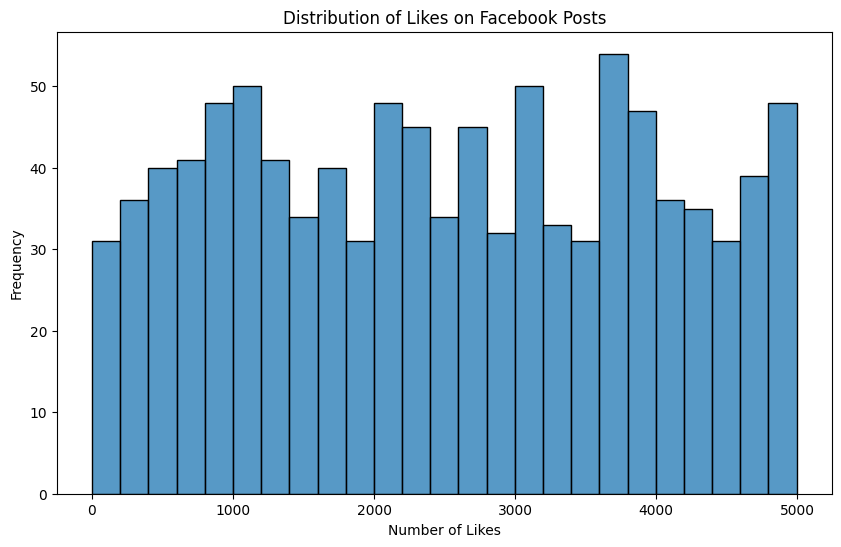

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Likes', bins=25)     
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes on Facebook Posts')
plt.show()

The histogram shows that the grouping of 3600-3800 likes has the highest frequency, but it's difficult to draw any actionable conclusions from this plot. If I instead define thresholds for the performance of the posts (e.g. by binning them into categories for 'Poor', 'Good', and 'Excellent' performance based on number of Likes), it will be easier to see how much engagement the client generates with its posts. Furthermore, we can subdivide the bars to see how each subject is represented in each Likes category. 

## Histogram of Likes by Performance and Category (Poor, Good, and Excellent)

In [12]:
# Calculate percentiles for thresholds
low_threshold = np.percentile(df['Likes'], 33)
high_threshold = np.percentile(df['Likes'], 66)

print(f'Low threshold: {low_threshold}')
print(f'High threshold: {high_threshold}')


Low threshold: 1653.0
High threshold: 3286.0600000000004


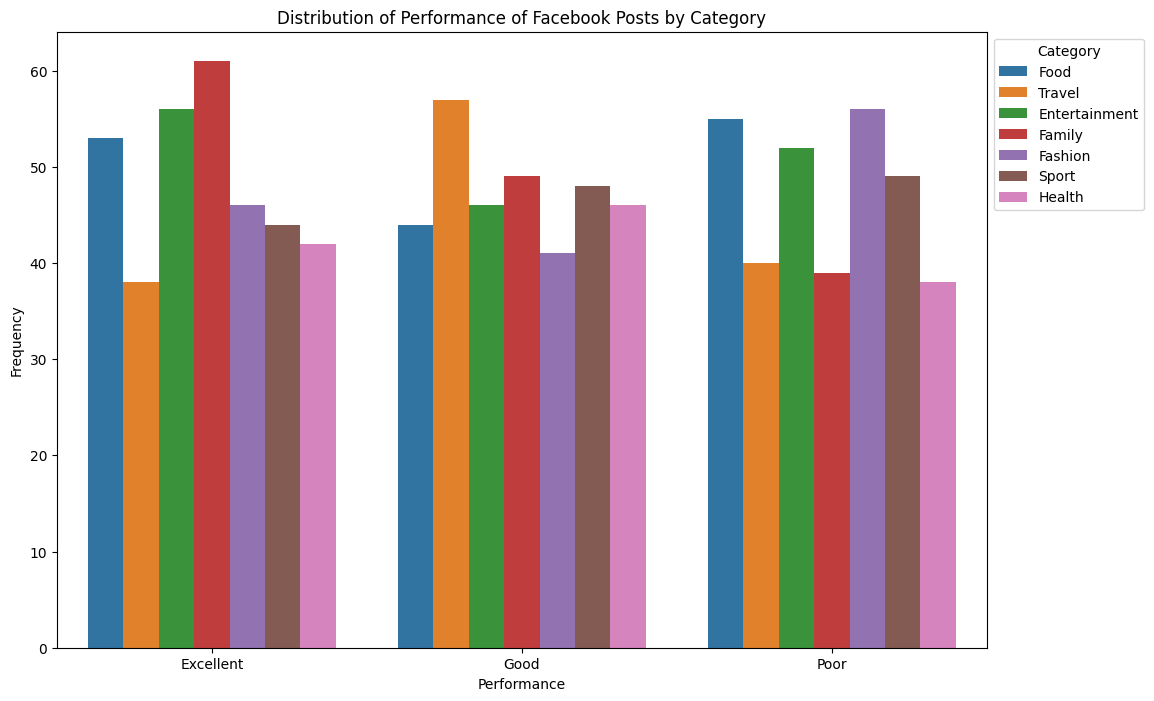

In [13]:
def categorize_performance(likes):
    if likes < low_threshold:
        return 'Poor'
    elif likes < high_threshold:
        return 'Good'
    else:
        return 'Excellent'

df['Performance'] = df['Likes'].apply(categorize_performance)


# Plotting the count plot to show distribution of likes categories
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Performance', hue='Category')
plt.xlabel('Performance')
plt.ylabel('Frequency')
plt.title('Distribution of Performance of Facebook Posts by Category')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

Here we can see most posts in the 'Excellent' category relate to Family. Most of the posts in the 'Poor' category relate to Fashion. Travel produces the largest number of 'Good' posts, but fewer posts at either end of the spectrum. Interestingly, Food and Entertainment feature heavily in both the 'Excellent' and 'Poor' category, so it would be useful to try to find out what other factors determine the popularity of posts in these categories. With a box plot we can examine the distribution of likes across each category in more detail.   

## Boxplot of Likes by Category

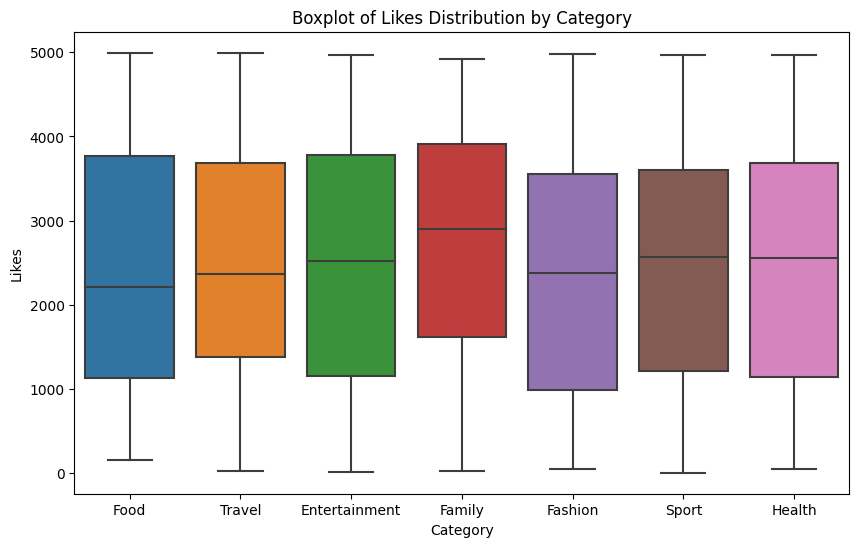

In [14]:
# Boxplot showing the distribution per category

plt.figure(figsize=(10, 6))

sns.boxplot(x="Category",
                y="Likes",
                data=df)


plt.title('Boxplot of Likes Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.grid(False) 
plt.show()


The max and min values are very similar across all categories. The length of the box (which represents the interquartile range) looks to be greatest for Food and Entertainment, and smallest for Travel and Family. Let's print out the exact values of the IQR for each category to see this in more detail:

In [15]:
# Calculate Q1 (25th percentile)
q1 = df.groupby('Category')['Likes'].quantile(0.25)

# Calculate Q3 (75th percentile)
q3 = df.groupby('Category')['Likes'].quantile(0.75)

# Combine Q1 and Q3 into a single dataframe for better readability
iqr_df = pd.DataFrame({'Q1': q1, 'Q3': q3})

# Calculate IQR
iqr_df['IQR'] = iqr_df['Q3'] - iqr_df['Q1']

iqr_df

,Q1,Q3,IQR
Category,,,
Entertainment,1153.75,3775.00,2621.25
Family,1612.00,3907.00,2295.00
Fashion,991.00,3559.50,2568.50
Food,1133.25,3762.50,2629.25
Health,1138.50,3681.25,2542.75
Sport,1208.00,3607.00,2399.00
Travel,1381.00,3685.00,2304.00


This confirms that the smallest IQRs belong to Family and Travel, and the largest IQRs belong to Entertainment and Food. A smaller IQR indicates that the central data are closer together for these three categories, so the data is more consistent, while the other categories show slightly more variability.   

Going back to the boxplot, we can see two categories (Food, Travel) where the median appears below the centre of the box, indicating a right-skewed distribution (higher concentration of data points among lower values). The other categories have a median above the centre of the box, so are left-skewed (higher concentration of data points among higher values). 

We know the date when each post was made; a boxplot showing number of likes by category for different days of week might reveal if some categories tend to perform better at certain times of the week.   

## Boxplot of Likes by Day of the Week

In [16]:
# Extract the day of the week from Date and show value counts

df['day_of_week'] = df['Date'].dt.day_name()
print(df['day_of_week'].value_counts())

day_of_week
Thursday     153
Wednesday    153
Friday       152
Monday       148
Saturday     139
Tuesday      139
Sunday       116
Name: count, dtype: int64


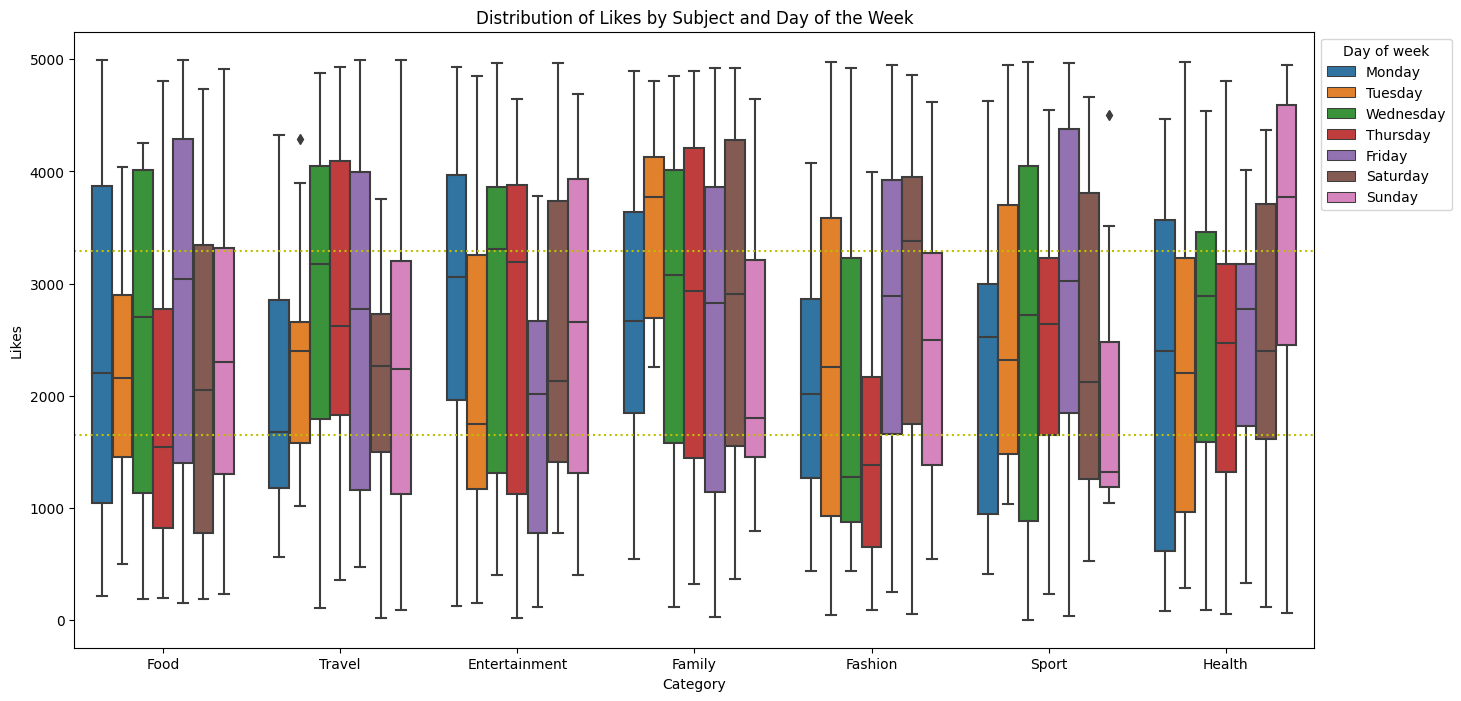

In [17]:
# Define the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' to categorical with the specified order
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

# Boxplot for each subject with different boxes for each day of the week
plt.figure(figsize=(16, 8))
sns.boxplot(x='Category', y='Likes', hue='day_of_week', data=df)
plt.title('Distribution of Likes by Subject and Day of the Week')
plt.legend(title='Day of week', bbox_to_anchor=(1, 1))

plt.axhline(y=low_threshold, color='y', linestyle=':')
plt.axhline(y=high_threshold, color='y', linestyle=':')

plt.show()


Remember the threshold for 'Poor' performance is 1653, and the threshold for 'Excellent' performance is 3286. These are shown on the boxplot as dotted yellow lines.

The length of the boxes will show us the range in which distributions are concentrated, while the position of the median line within the boxes indicate whether there is a skew in the distribution of the data.  

Generally the boxes are long, showing quite a bit of variability in the performance of posts. However, some of the boxes are much shorter than the others, suggesting that posts in these categories perform more consistently on these days. For example, Travel posts on Tuesdays and Saturdays consistently have a 'Good' performance; Family posts on Tuesdays consistently perform well, with a tendency towards 'Excellent' performance; Sport posts on Sundays generally perform poorly, with a tendency towards 'Poor' performance.


## Statistical analysis

We can compare the mean number of Likes for each category with the overall mean number of Likes for the whole dataset.

In [18]:
df.Likes.mean()

2505.172

In [19]:
groups = df.groupby('Category')
groups.Likes.mean()

Category
Entertainment    2530.857143
Family           2762.966443
Fashion          2377.678322
Food             2424.875000
Health           2459.476190
Sport            2499.382979
Travel           2465.496296
Name: Likes, dtype: float64

Family and Entertainment posts generate on average more likes than the average for the whole dataset. Fashion generates noticeably fewer likes on average than the dataset as a whole.

# Conclusion
 
My analysis reveals two issues: low median values and values with high variability. In order to improve the performance of posts, we need to try to raise median values to above the threshold for 'Poor' performance, as well as improve the consistency of post performance by reducing the IQR.

## Step 1: Addressing Low Median Values  
* Identify poor-performing days: If a category consistently shows low median values and/or a skew towards lower values on a specific day of the week, it indicates that this day might not be optimal for posting in that category.  
* Recommendation: Consider scheduling tweets for this category on other days that show higher median values, where tweets tend to perform better.  

*For example:*  
* Food posts tend to perform poorly on Thursdays. Performance varies quite a bit in this category, but the data seems to suggest that moving these posts to Fridays would produce better results.  
* Wednesdays and Thursdays appear to be particularly bad times to post about Fashion. Friday and Saturday posts perform much better.  
* Sport posts on Sundays perform consistently poorly. The client would probably see an improvement in engagement by moving these posts to Fridays.

## Step 2: Analysing High Variability (IQR)  
* Deep analysis of tweets: For categories posted on days that result in a high IQR, we should perform a deeper analysis to understand why there's such a wide range of performance.  
* Recommendation: Use Natural Language Processing (NLP) techniques to analyse the content of the tweets to identify patterns in successful vs. less successful tweets.